In [1]:
from google.colab import files
uploaded = files.upload()

Saving sales_data_samples.csv to sales_data_samples.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('sales_data_samples.csv', encoding='ISO-8859-1')


In [13]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,profit
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,0.000000e+00
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,4.547474e-13
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,4.547474e-13
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,-4.547474e-13
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,3.052700e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,...,NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small,2.444000e+02
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,...,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium,1.078510e+03
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,...,NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium,1.117570e+03
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,...,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small,0.000000e+00


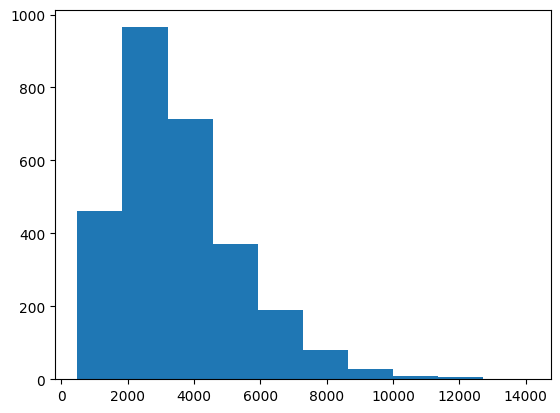

In [4]:
import seaborn as sns
x=df['ORDERNUMBER']
y=df['SALES']

plt.hist(df['SALES'])

plt.show()

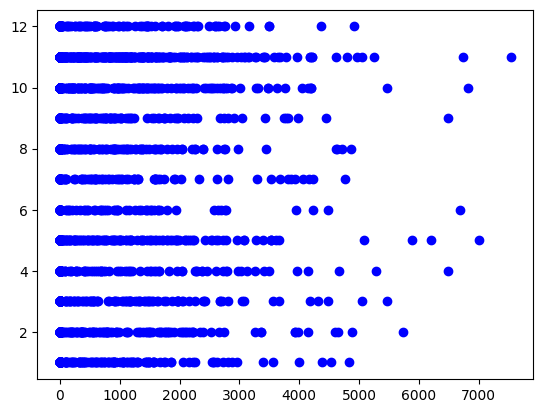

In [5]:
# Finding the total profit of all months
df['profit'] = df['SALES']-(df['QUANTITYORDERED']*df['PRICEEACH'])

plt.scatter(df['profit'],df['MONTH_ID'],color='b')
plt.show()

Text(0.5, 1.0, 'this is the product line')

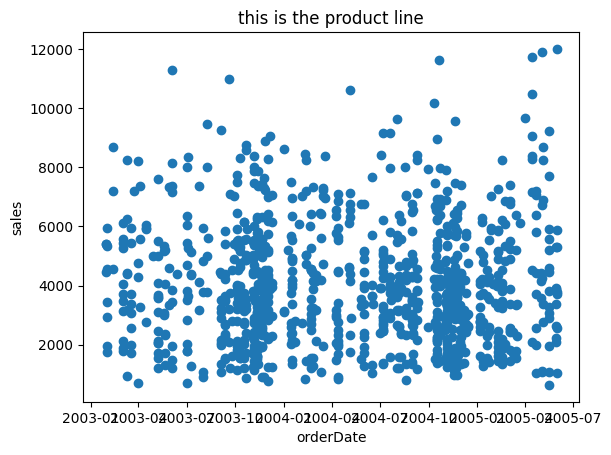

In [6]:
import pandas as pd
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Use .query() to filter data for 'Classic Cars' product line
classic_cars_data = df.query("PRODUCTLINE == 'Classic Cars'")

# Display the sales data for Classic Cars
plt.scatter(classic_cars_data['ORDERDATE'],classic_cars_data['SALES'])




plt.xlabel('orderDate')
plt.ylabel('sales')
plt.title('this is the product line')

<BarContainer object of 301 artists>

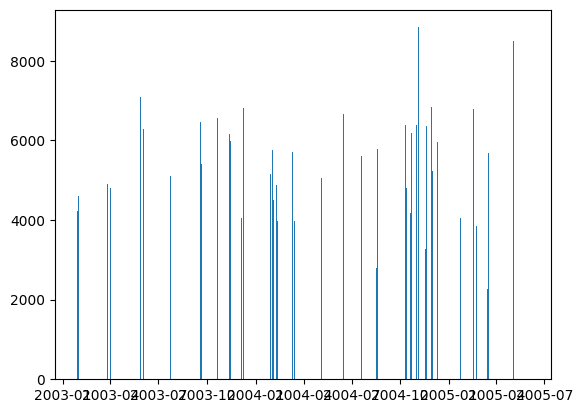

In [7]:
trucks_buses = df.query("PRODUCTLINE=='Trucks and Buses'")
plt.bar(trucks_buses['ORDERDATE'],trucks_buses['SALES'],width=1.2)

In [8]:
# read the total profit
monthly_profits = df.groupby('MONTH_ID')['profit'].sum()
# plt.scatter(monthly_profits['MONTH_ID'],monthly_profits['profit'])

# plt.scatter(monthly_profits['index'],monthly_profits['values'])
# plt.show()

monthly_profits

MONTH_ID
1     126292.15
2     142113.75
3     128314.66
4     109056.50
5     167159.65
6      70013.19
7      93902.63
8     107177.66
9     109824.15
10    202178.52
11    374203.22
12    111505.98
Name: profit, dtype: float64

#**Handling with missing values**

In [11]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
profit                 0
dtype: int64

In [12]:
df['TERRITORY'].head()

0     NaN
1    EMEA
2    EMEA
3     NaN
4     NaN
Name: TERRITORY, dtype: object

In [19]:
df['POSTALCODE'] = df['POSTALCODE'].fillna(df['POSTALCODE'].mean())
df

TypeError: ignored